In [40]:
import umap
import numpy as np
import matplotlib.pyplot as plt

In [41]:
reducer = umap.UMAP()

In [42]:
npz = np.load("out/wav2vec2-large-xlsr-53-layer12-mvn/embedings.npz")
keys = [*npz]
z = np.array([npz[k] for k in keys])

In [43]:
z.shape

(482, 1024)

In [44]:
embedding = reducer.fit_transform(z)

In [45]:
embedding.shape

(482, 2)

/tmp/ipykernel_432783/434687478.py:12: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(


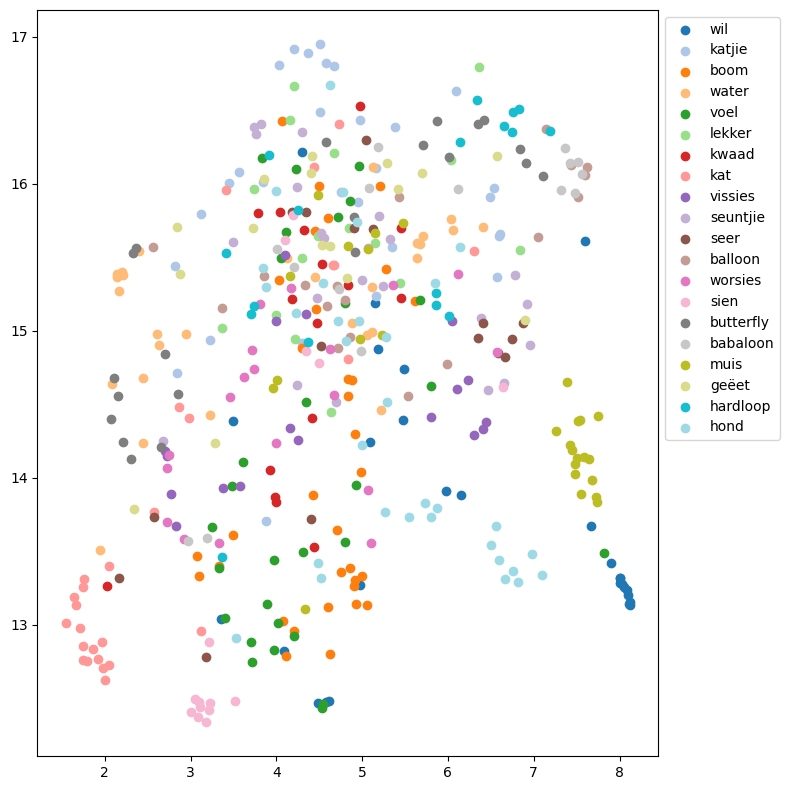

In [46]:
from matplotlib import colormaps
# print(list(colormaps))
colors = colormaps["tab20"].colors

plt.figure(figsize=(8,8))

labels = [x.split("_")[0] for x in keys]
labels_np = np.array(labels)
for i, label in enumerate(list(set(labels))[:20]):
    # print(label)
    # print(i)
    plt.scatter(
      embedding[labels_np==label, 0],
      embedding[labels_np==label, 1],
      label=label,
     c=colors[i])

plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()

# plt.gca().set_aspect('equal', 'datalim')
# plt.title('UMAP projection of the Penguin dataset', fontsize=24);